<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/>
    <b>GRUPO 3</b>
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

**Dataset:**

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.
*   `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
*   `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

# 1. Exploración del dataset

En esta fase vamos a cargar y preparar el dataset para realizar la fase EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing

import warnings
warnings.filterwarnings('ignore')

Cargamos el dataset y exploramos su estructura y datos.

In [2]:
df = pd.read_csv('training_set_features_original.csv', index_col="respondent_id")
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


El dataset tiene 26707 filas y 36 columnas.

In [3]:
df.shape

(26707, 35)

Tipos de datos por columna:

In [4]:
df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

# 2. Depuración de datos

En esta etapa vamos a evaluar la existencia de valores nulos y valores duplicados.

## Valores duplicados

No se encontraron datos duplicados.

In [6]:
df.duplicated(keep='first').sum()

0

## Valores nulos

In [7]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Vamos a remover las columnas con un alto volumen de valores nulos que tienen datos irrelevantes.
*   `hhs_geo_region` no tiene nulos, pero tiene textos irrelevantes.
*   `employment_industry` (13330), los textos son irrelevantes.
*   `employment_occupation` (13470), los textos son irrelevantes.


In [8]:
# Remove columns hhs_geo_region, employment_industry, employment_occupation with a high volume of null values and texts no relevant.
df.drop(['hhs_geo_region'], axis=1, inplace=True)
df.drop(['employment_industry'], axis=1, inplace=True)
df.drop(['employment_occupation'], axis=1, inplace=True)

Text(0.5, 1.0, 'Missing Values Heatmap')

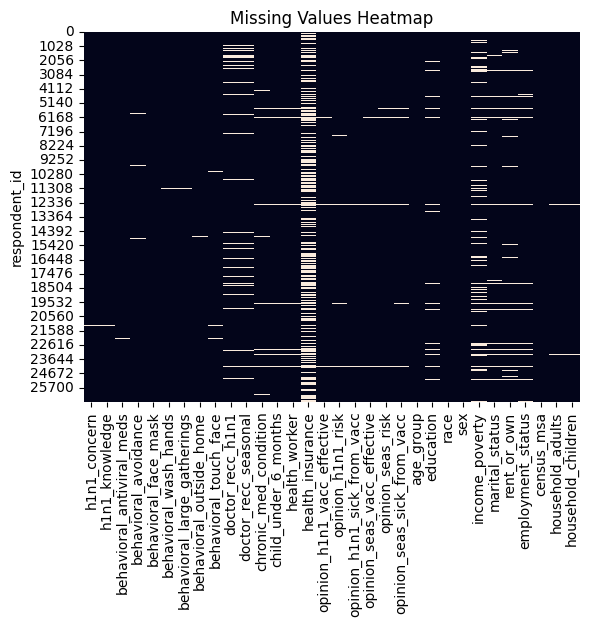

In [9]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing Values Heatmap")

In [10]:
df.shape

(26707, 32)

In [11]:
df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Tenemos varias variables categóricas binarias tipo 1/0. Solo en algunos pocos casos podríamos asumir que una "no respuesta" se puede poblar con la respueta negativa 0:
*   `doctor_recc_h1n1` **2160 valores nulos**. Indica si una vacuna h1n1 fue recomendada por el doctor.
*   `doctor_recc_seasonal` **2160 valores nulos**. Indica si una vacuna estacional fue recomendada por el doctor.
*   `health_worker` **804 valores nulos**. Indica si es un trabajador de la salud.
*   `health_insurance` **12274 valores nulos**. Indica si el encuestado tiene o no un seguro médico.




In [12]:
print("null ", df['doctor_recc_h1n1'].isnull().sum())
print(df['doctor_recc_h1n1'].value_counts())

null  2160
0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64


In [13]:
print("null ", df['doctor_recc_seasonal'].isnull().sum())
print(df['doctor_recc_seasonal'].value_counts())

null  2160
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64


In [14]:
print("null ", df['health_worker'].isnull().sum())
print(df['health_worker'].value_counts())

null  804
0.0    23004
1.0     2899
Name: health_worker, dtype: int64


In [15]:
print("null ", df['health_insurance'].isnull().sum())
print(df['health_insurance'].value_counts())

null  12274
1.0    12697
0.0     1736
Name: health_insurance, dtype: int64


Poblamos los nulos de las variables categóricas binarias cuya no respuesta, se puede poblar con respuesta negativa 0:

In [16]:
df.loc[df["health_worker"].isnull(), 'health_worker'] = 0
df.loc[df["health_insurance"].isnull(), 'health_insurance'] = 0

`doctor_recc_h1n1` y `doctor_recc_h1n1` se poblarán más adelante, dado que están correlacionadas entre ellas.

In [17]:
df.isnull().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                     0
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

Text(0.5, 1.0, 'Missing Values Heatmap')

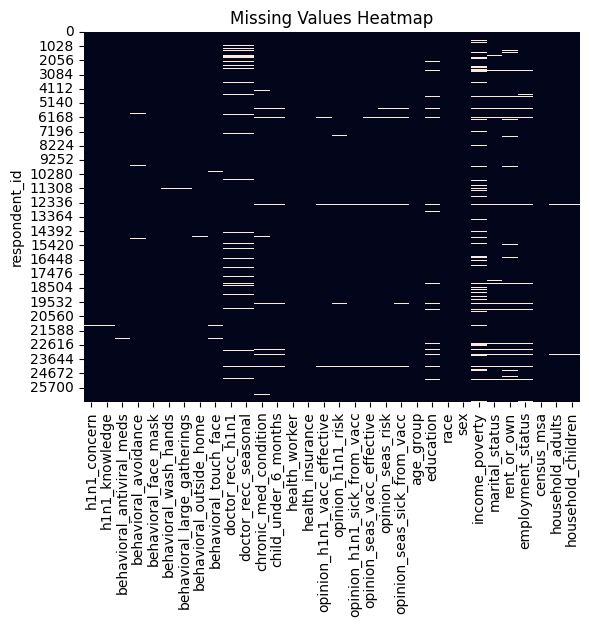

In [18]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing Values Heatmap")

# Distribución de los datos

En esta fase vamos a realizar diferentes visualizaciones del dataset, que nos van a permitir tener un conocimiento más profundo de los datos.

In [19]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26707.000000,26707.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.108548,0.475418,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.311077,0.499405,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [20]:
df["sex"].value_counts(normalize=True)

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

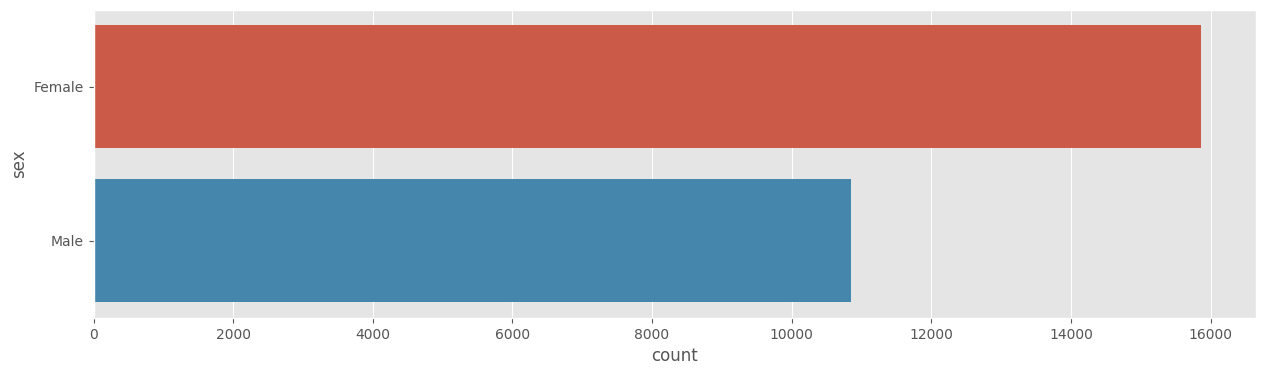

In [21]:
plt.style.use('ggplot')
plt.figure(1 , figsize = (15 , 4))
sns.countplot(y = 'sex' , data = df)
plt.show()

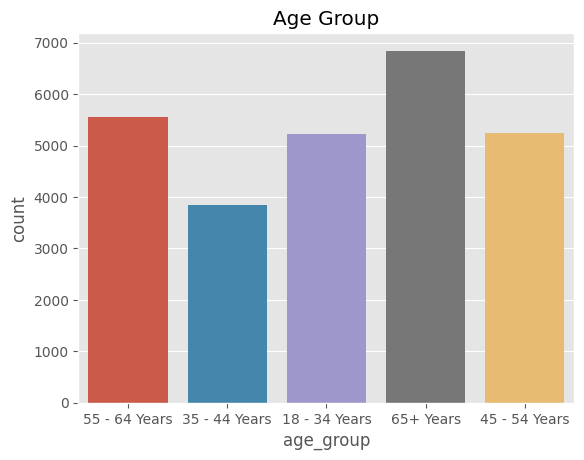

In [22]:
sns.countplot(x = df['age_group'])
plt.title("Age Group")
plt.show()

<Axes: title={'center': 'Age Group'}, ylabel='age_group'>

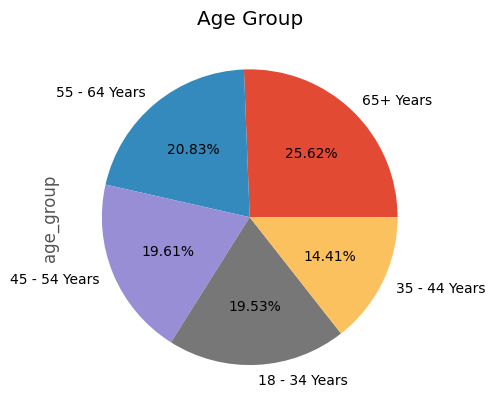

In [23]:
df['age_group'].value_counts().plot.pie(autopct = '%1.2f%%', title='Age Group')

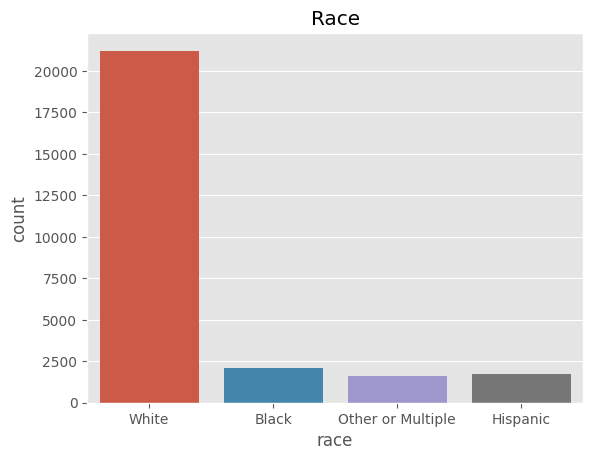

In [24]:
sns.countplot(x = df['race'])
plt.title("Race")
plt.show()

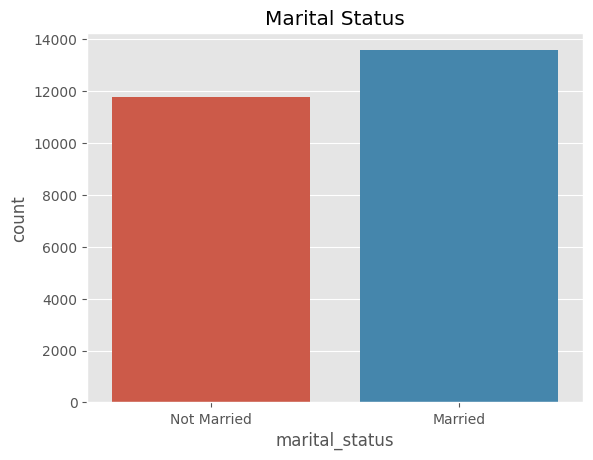

In [25]:
sns.countplot(x = df['marital_status'])
plt.title("Marital Status")
plt.show()

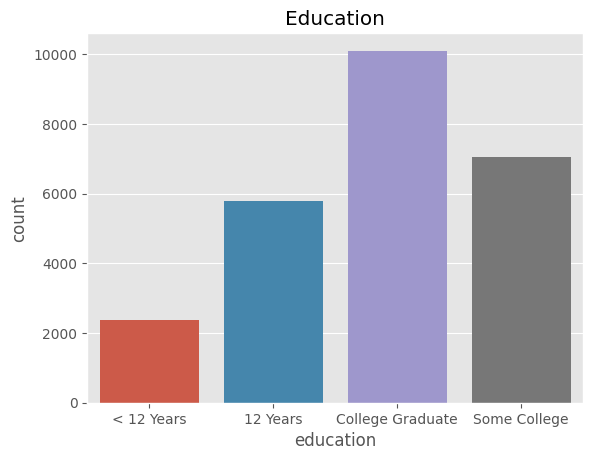

In [26]:
sns.countplot(x = df['education'])
plt.title("Education")
plt.show()

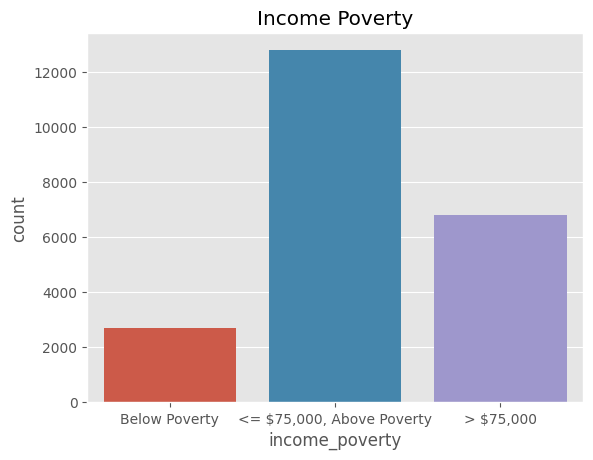

In [27]:
sns.countplot(x = df['income_poverty'])
plt.title("Income Poverty")
plt.show()

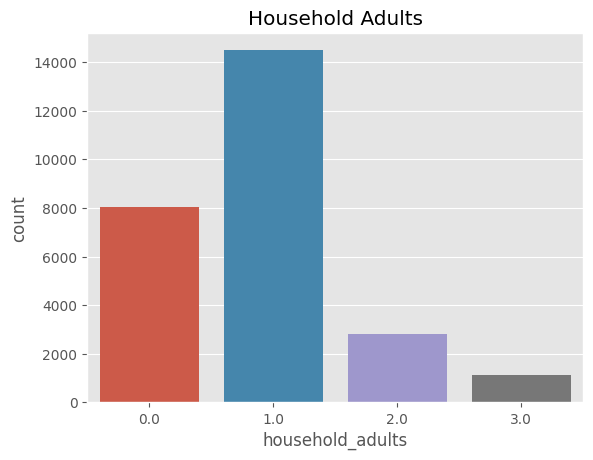

In [28]:
sns.countplot(x = df['household_adults'])
plt.title("Household Adults")
plt.show()


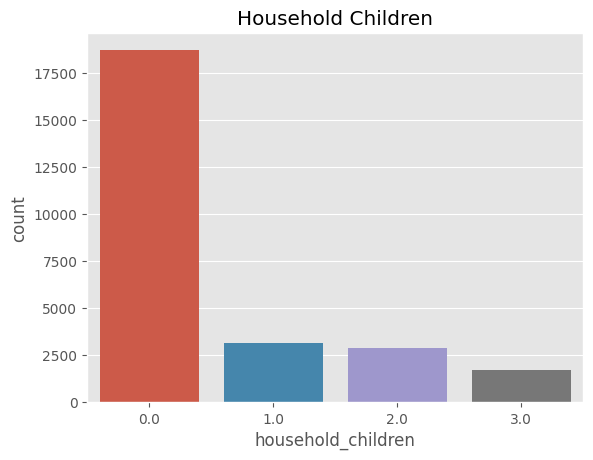

In [29]:
sns.countplot(x = df['household_children'])
plt.title("Household Children")
plt.show()

Por los gráficos anteriores, vemos que nuestra muestra de encuestados presenta las siguientes características:

1.   60% son mujeres, 40% hombres.
2.   El grupo de edad con más encuestados, es los mayores de 65 años, pero hay datos representativos para todos los grupos de edad.
3.   La muestra está centrada en personas de raza blanca.
4.   La muestra tiene personas casadas y no casadas de manera equilibrada.
5.   La mayoría de la muestra tiene un buen nivel de educación.
6.   La mayoría de la muestra tiene ingresos de clase media, y muy pocos tocan la línea de pobreza.
7.   La mayoría de encuestados viven en núcleos familiares sin niños y pocos adultos.



<Axes: xlabel='sex'>

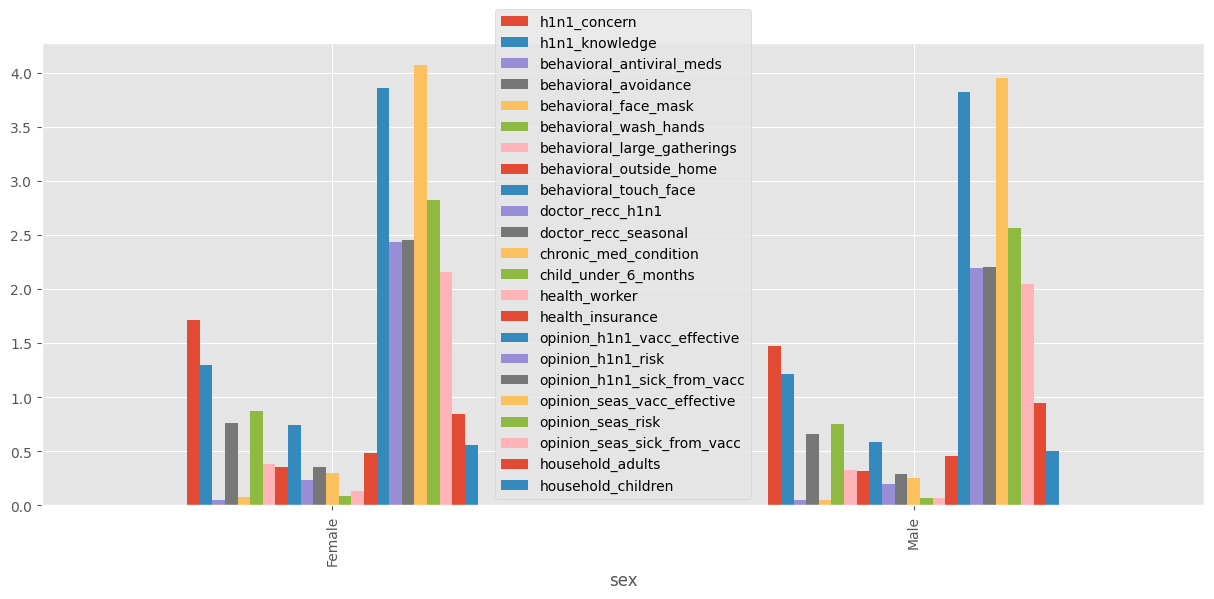

In [30]:
df.groupby('sex').mean().plot(kind='bar',figsize=(15,6),)



Del gráfico anterior podemos observar que las respuestas están balanceadas por género, sin diferencias considerables en las respuestas a causa de ello.

Solo vemos algunos pocos valores mayores entre las mujeres, pero también se debe a que la población de mujeres es mayor.

Hay mayor preocupación por el H1N1 y más trabajadoras de la salud, entre las mujeres.

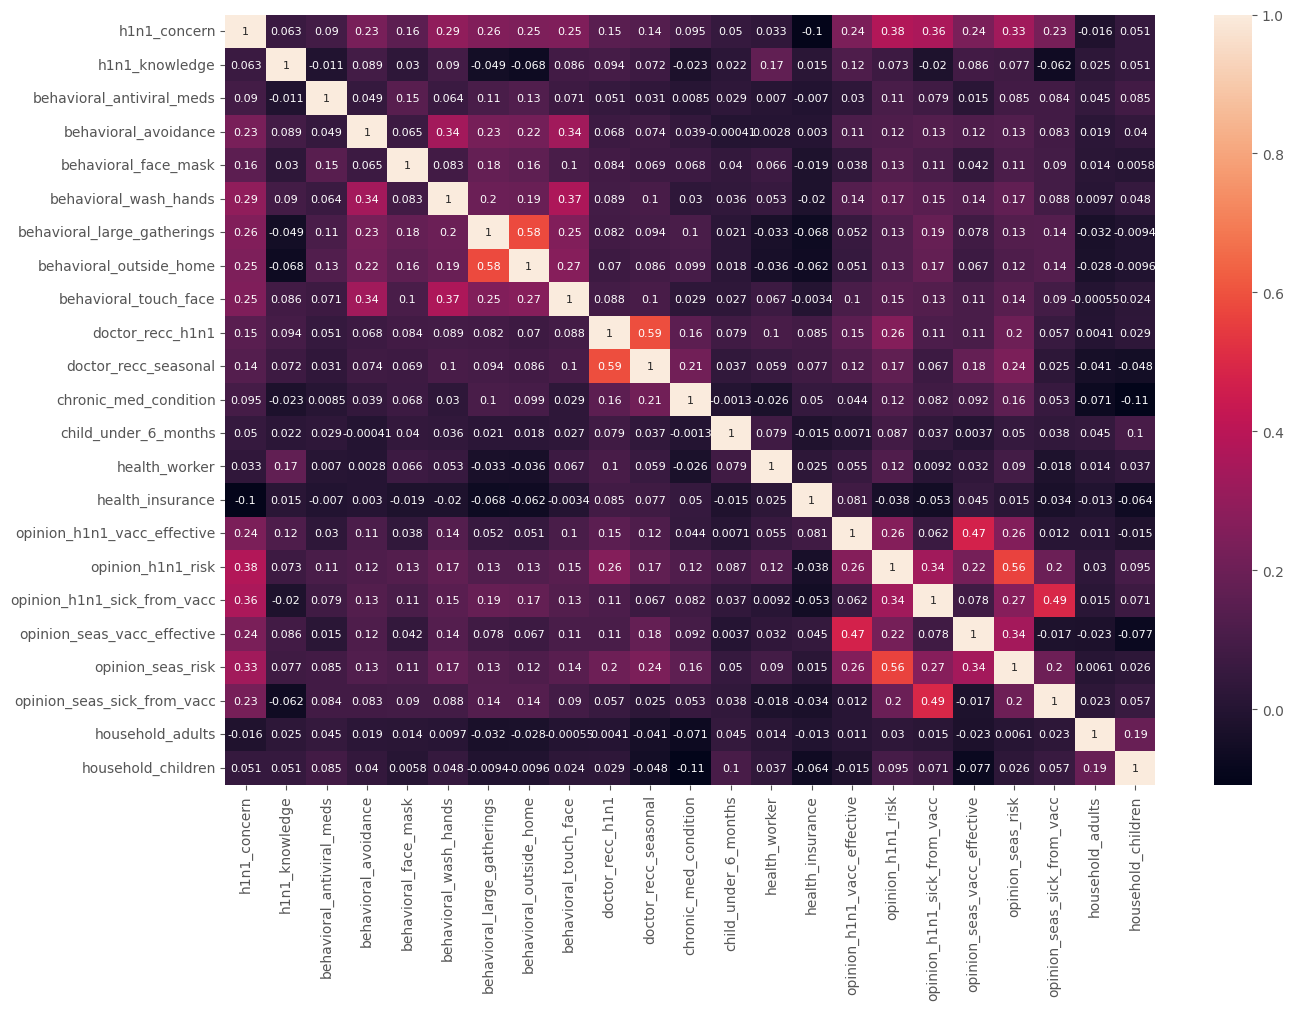

In [31]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

Del gráfico anterior podemos observar que no tenemos variables fuertemente correlacionadas entre sí.

Solo entre algunas que apuntan a capturar información similar, por ejemplo:


*   `behavioral_large_gatherings` con `behavioral_outside_home`
*   `doctor_recc_h1n1` con `doctor_recc_seasonal`
*   `opinion_h1n1_risk` con `opinion_seas_risk`



# Variables Categóricas

En esta fase vamos a reemplazar las variables categóricas a valores numéricos.

Las variables a reemplazar son:

1.   `age_group` - Age group of respondent.
2.   `education` - Self-reported education level.
3.   `race` - Race of respondent.
4.   `sex` - Sex of respondent.
5.   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
6.   `marital_status` - Marital status of respondent.
7.   `rent_or_own` - Housing situation of respondent.
8.   `employment_status` - Employment status of respondent.
9.   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.



In [32]:
label_encoder = preprocessing.LabelEncoder()
df_temporal=df.copy() #se usará sólo para analizar la correlación

#se procede a eliminar todos los nulls sólo para el análisis de correlación
#ya que al pasar las variables categoricas a label encoder, los nulls se tomarían como una
#nueva categoría
df_temporal.dropna(inplace=True)

In [33]:
df_temporal.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

In [34]:
df["age_group"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [35]:
# age_group
df_temporal['age_group']=label_encoder.fit_transform(df_temporal["age_group"])

In [36]:
df["education"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [37]:
# education
df_temporal['education']=label_encoder.fit_transform(df_temporal["education"])

In [38]:
df["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [39]:
# race
df_temporal['race']=label_encoder.fit_transform(df_temporal["race"])

In [40]:
df["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [41]:
# sex
df_temporal['sex']=label_encoder.fit_transform(df_temporal["sex"])

In [42]:
df["income_poverty"].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [43]:
# income_poverty
df_temporal['income_poverty']=label_encoder.fit_transform(df_temporal["income_poverty"])

In [44]:
df["marital_status"].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [45]:
# marital_status
df_temporal['marital_status']=label_encoder.fit_transform(df_temporal["marital_status"])

In [46]:
df["rent_or_own"].value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

In [47]:
# rent_or_own
df_temporal['rent_or_own']=label_encoder.fit_transform(df_temporal["rent_or_own"])

In [48]:
df["employment_status"].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [49]:
# employment_status
df_temporal['employment_status']=label_encoder.fit_transform(df_temporal["employment_status"])

In [50]:
df["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [51]:
# census_msa
df_temporal['census_msa']=label_encoder.fit_transform(df_temporal["census_msa"])

Ahora que las variables categóricas han sido convertidas a valores numéricos, vamos a revisar de nuevo la distribución de los datos.

In [52]:
df_temporal.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,...,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000,19651.000000
mean,1.615541,1.302580,0.049514,0.740369,0.067783,0.834868,0.353366,0.330161,0.684902,0.226095,...,1.764338,2.585517,0.407409,0.547555,0.451682,0.237342,0.492748,0.836192,0.903211,0.551371
std,0.888158,0.596208,0.216944,0.438443,0.251379,0.371309,0.478027,0.470283,0.464567,0.418312,...,1.088119,0.908177,0.491365,0.694079,0.497673,0.425464,0.604298,0.825907,0.746149,0.938487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000


Ahora, una vez que las variables categóricas son numéricas, vemos si existe correlación entre ellas.

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

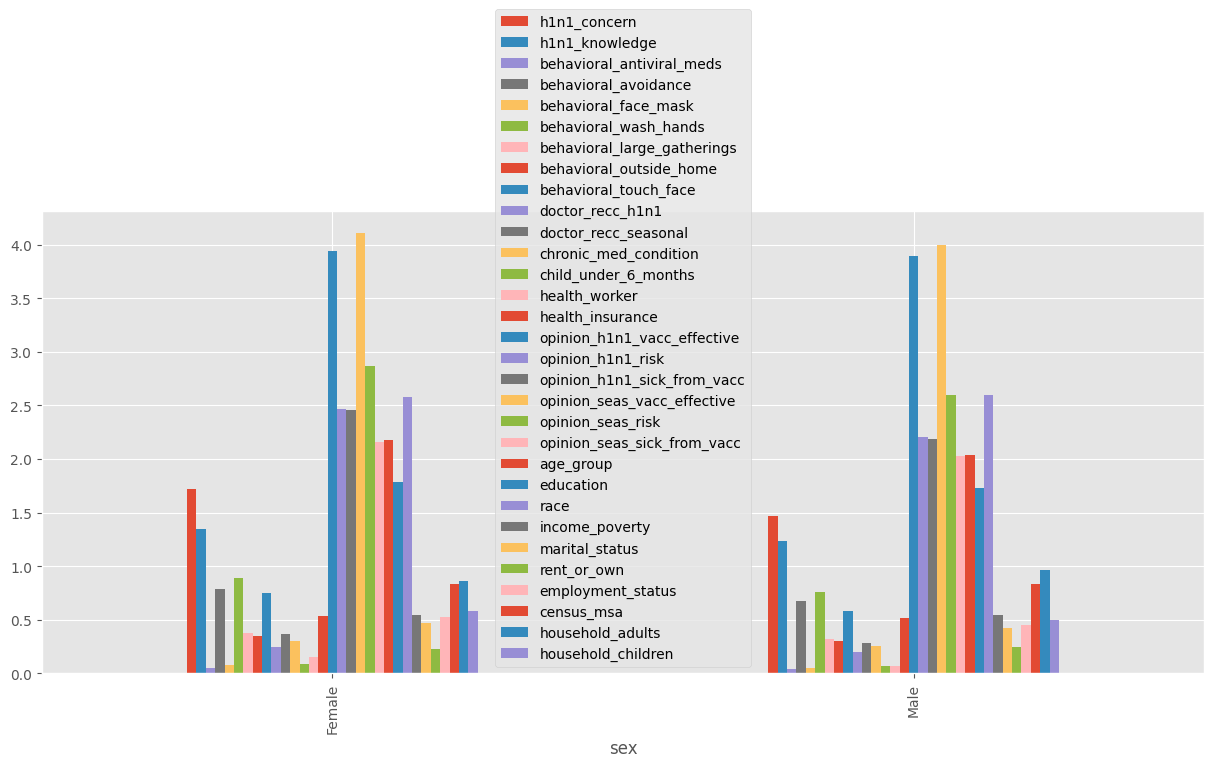

In [53]:

ax=df_temporal.groupby('sex').mean().plot(kind='bar',figsize=(15,6))
nuevos_nombres = ['Female', 'Male']  # Lista de nuevos nombres
ax.set_xticklabels(nuevos_nombres)

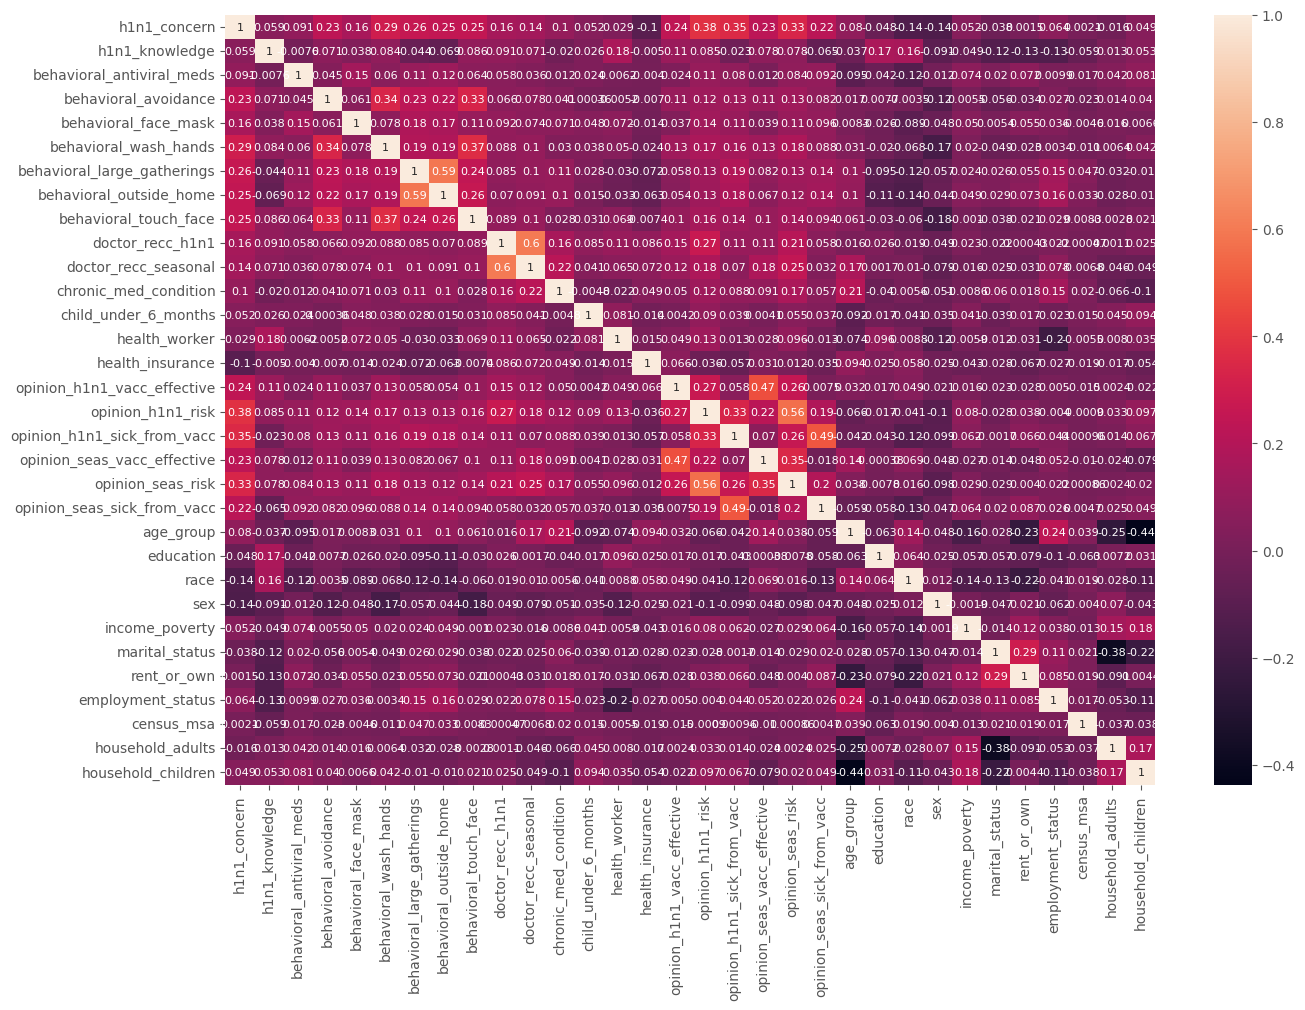

In [54]:
plt.figure(figsize=(15,10))
corrMatrix = df_temporal.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"fontsize":8})
plt.show()

No vemos correlaciones fuertes tampoco al incluir las variables categóricas en el análisis.

# Análisis de Variables

En esta fase vamos a explorar la relación particular entre algunas variables.

In [83]:
df_labels = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

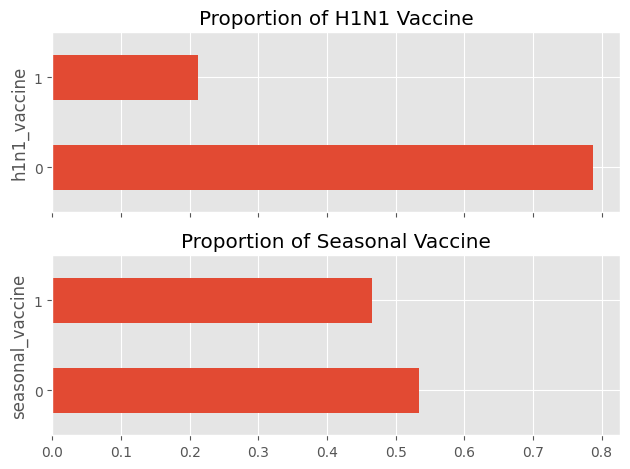

In [84]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = df_labels.shape[0]

(df_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(df_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

La mitad de la población recibió la vacuna de gripe estacional (clases balanceadas), pero solo un 20% la de H1N1 (clases moderadamente desbalanceadas).

In [87]:
joined_df = df_training_eda.join(df_labels)
print(joined_df.shape)
joined_df.head()

(26707, 33)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,1,0,1,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,1,1,0,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,0,0,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,1,1,1,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,1.0,0.0,0,0


In [88]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']]
              .groupby(['h1n1_concern', 'h1n1_vaccine'])
              .size()
              .unstack('h1n1_vaccine')
         )
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8178,2489
3.0,3250,1341


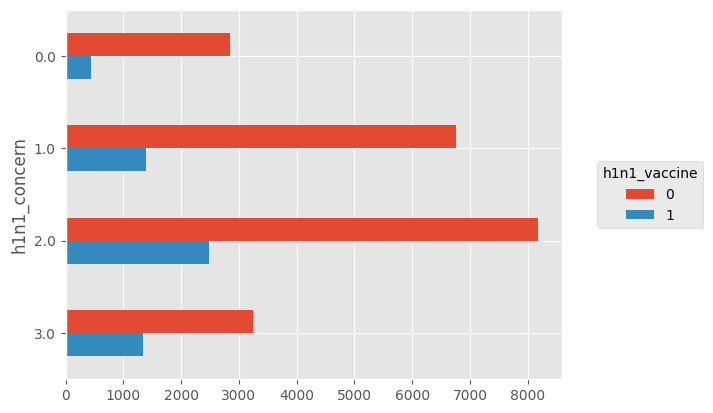

In [89]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

In [91]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

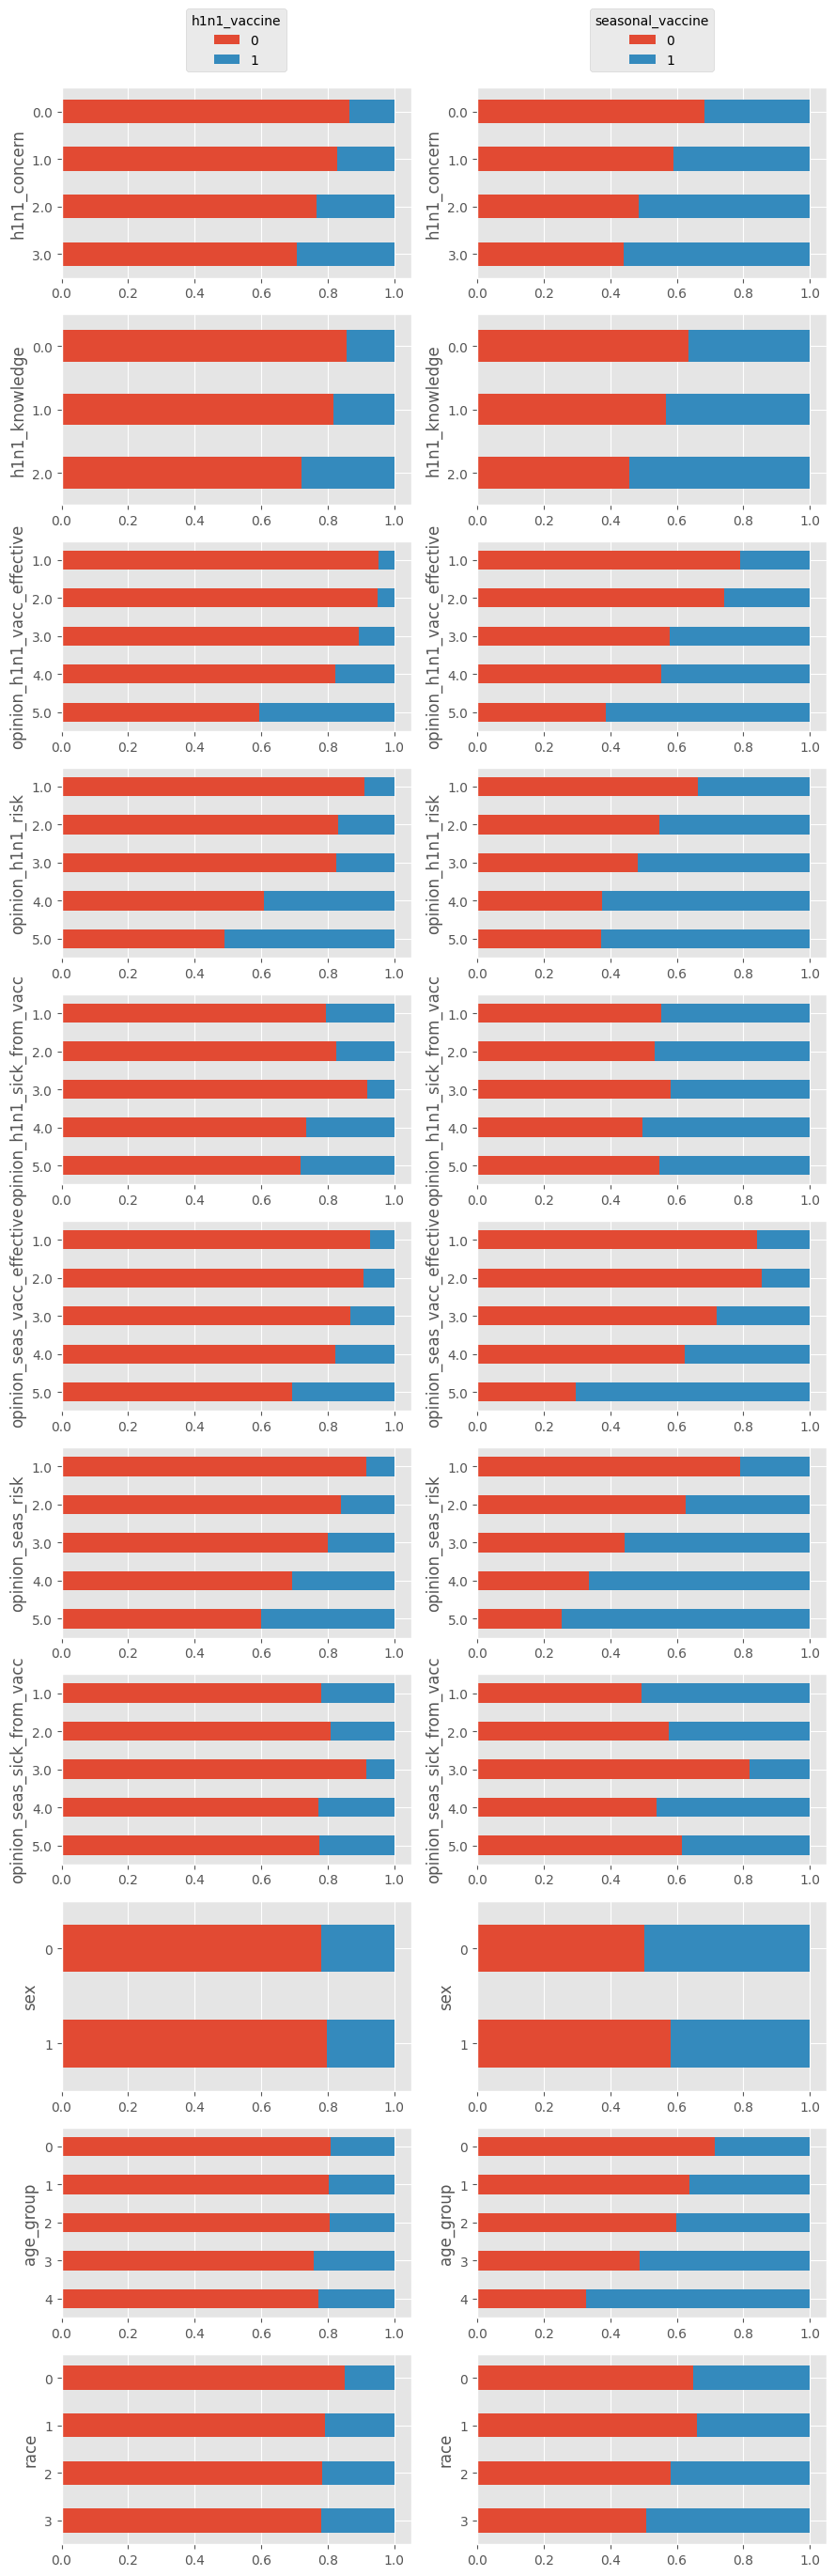

In [92]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

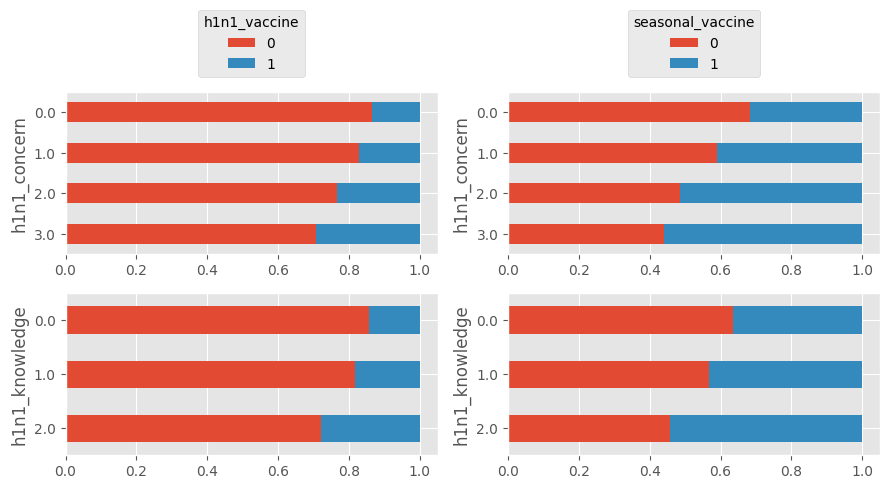

In [93]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

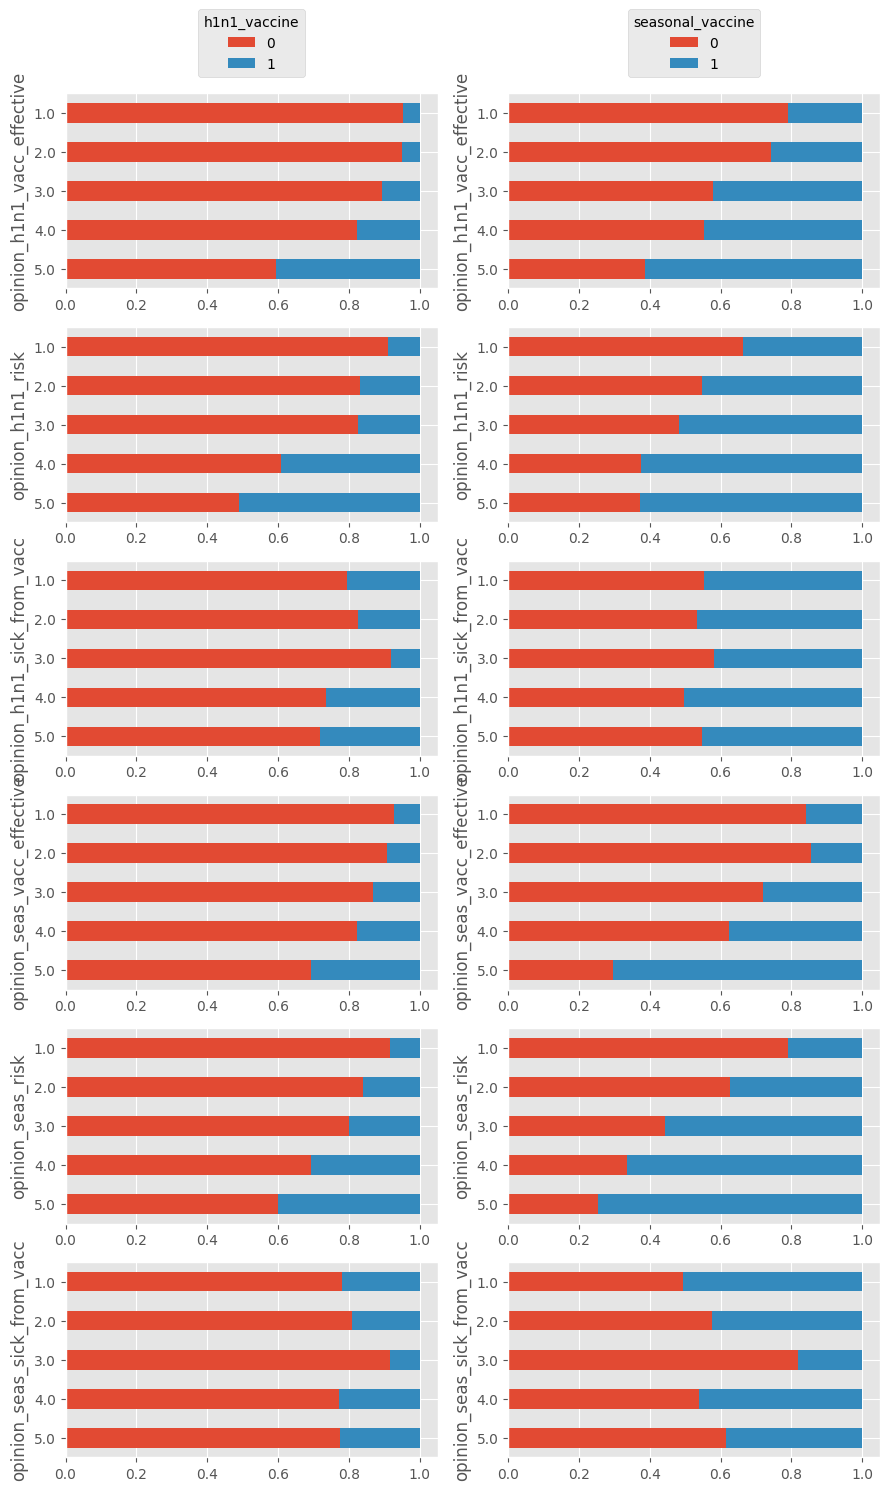

In [94]:
cols_to_plot = [
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

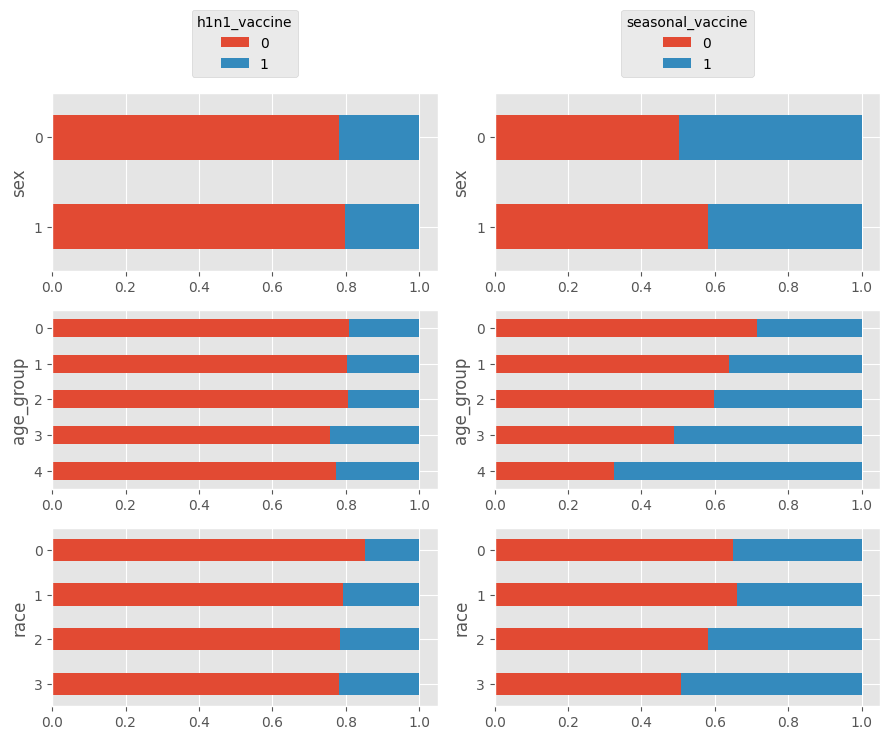

In [95]:
cols_to_plot = [
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Por los datos podemos observar que el nivel de preocupación por h1n1, crece propocionalmente al nivel de educación, y a un nivel mayor entre las mujeres.

In [55]:
df.groupby(['sex','education'])['h1n1_concern'].sum()

sex     education       
Female  12 Years            6123.0
        < 12 Years          2642.0
        College Graduate    9633.0
        Some College        7464.0
Male    12 Years            3541.0
        < 12 Years          1509.0
        College Graduate    6235.0
        Some College        3677.0
Name: h1n1_concern, dtype: float64

El uso de mascarilla es bajo en general, al igual que el lavado de manos habitual.

In [56]:
df["behavioral_face_mask"].value_counts(normalize=True)

0.0    0.931018
1.0    0.068982
Name: behavioral_face_mask, dtype: float64

In [57]:
df["behavioral_wash_hands"].value_counts(normalize=True)

1.0    0.825614
0.0    0.174386
Name: behavioral_wash_hands, dtype: float64

A mayor grupo de edad, mayores casos de condiciones médicas crónicas.

In [58]:
df.groupby(['sex','age_group'])['chronic_med_condition'].sum()

sex     age_group    
Female  18 - 34 Years     517.0
        35 - 44 Years     468.0
        45 - 54 Years     857.0
        55 - 64 Years    1051.0
        65+ Years        1726.0
Male    18 - 34 Years     279.0
        35 - 44 Years     237.0
        45 - 54 Years     450.0
        55 - 64 Years     701.0
        65+ Years        1004.0
Name: chronic_med_condition, dtype: float64

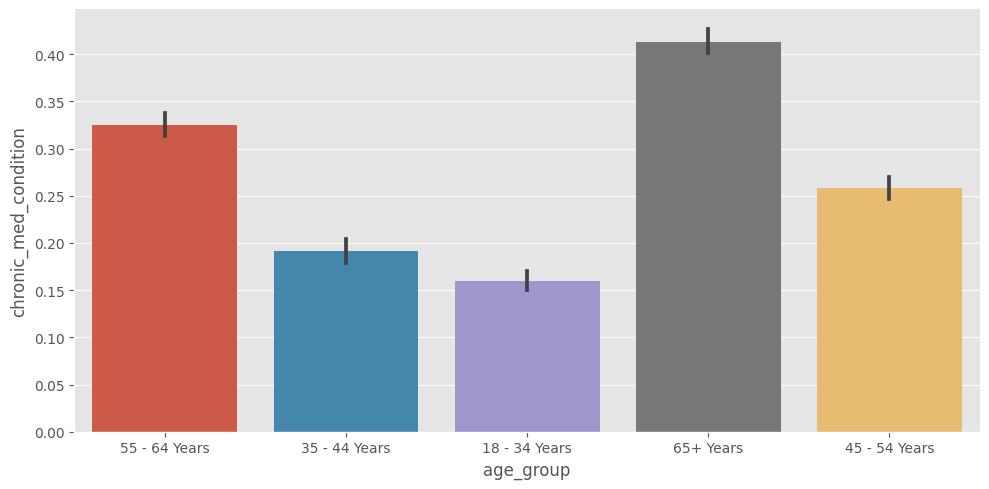

In [59]:
sns.catplot(x='age_group', y='chronic_med_condition', data=df, kind='bar', height=5, aspect=2)

El riesgo percibido de adquirir h1n1 por no tomar la vacuna es alto entre las mujeres, en especial en el grupo de mayor edad, pero entre los hombres se distribuye entre los grupos de edad.

In [60]:
df.groupby(['sex','age_group'])['opinion_h1n1_risk'].sum()

sex     age_group    
Female  18 - 34 Years    7138.0
        35 - 44 Years    5822.0
        45 - 54 Years    7664.0
        55 - 64 Years    7834.0
        65+ Years        9753.0
Male    18 - 34 Years    5234.0
        35 - 44 Years    3561.0
        45 - 54 Years    4530.0
        55 - 64 Years    4962.0
        65+ Years        5156.0
Name: opinion_h1n1_risk, dtype: float64

El riesgo percibido de enfermar al tomar la vacuna h1n1, es igualmente mayor entre mujeres de mayor edad, y distribuido entre hombres.

In [61]:
df.groupby(['sex','age_group'])['opinion_h1n1_sick_from_vacc'].sum()

sex     age_group    
Female  18 - 34 Years     7175.0
        35 - 44 Years     5626.0
        45 - 54 Years     7726.0
        55 - 64 Years     7846.0
        65+ Years        10103.0
Male    18 - 34 Years     5134.0
        35 - 44 Years     3630.0
        45 - 54 Years     4705.0
        55 - 64 Years     4967.0
        65+ Years         5123.0
Name: opinion_h1n1_sick_from_vacc, dtype: float64

Las opiniones sobre la efectividad de la vacuna h1n1 son en general altas.

In [62]:
df.groupby(['sex','age_group'])['opinion_h1n1_vacc_effective'].sum()

sex     age_group    
Female  18 - 34 Years    10557.0
        35 - 44 Years     8464.0
        45 - 54 Years    12105.0
        55 - 64 Years    12694.0
        65+ Years        16650.0
Male    18 - 34 Years     9000.0
        35 - 44 Years     5963.0
        45 - 54 Years     7844.0
        55 - 64 Years     8699.0
        65+ Years         9357.0
Name: opinion_h1n1_vacc_effective, dtype: float64

In [63]:
#exportamos el dataframe con los cambios previos a trabajar con los nulos faltantes
df.to_csv('training_set_features_eda.csv')

In [64]:
#############Análisis de Correlación incluyendo las variables target##########
df_labels_training = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
df_training_eda = pd.read_csv('training_set_features_eda.csv', index_col="respondent_id")#es donde haremos los cambios
df_not_nulls_encoder=pd.read_csv('training_set_features_original.csv', index_col="respondent_id").copy() #se usará sólo
#para analizar la correlación


df_not_nulls_encoder.loc[df["health_worker"].isnull(), 'health_worker'] = 0
df_not_nulls_encoder.loc[df["health_insurance"].isnull(), 'health_insurance'] = 0
#eliminamos los nulos
df_not_nulls_encoder.dropna(inplace=True, axis=0)
df_not_nulls_encoder.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [65]:
#label encoder
df_not_nulls_encoder['age_group']=label_encoder.fit_transform(df_not_nulls_encoder["age_group"])
df_not_nulls_encoder["education"]=label_encoder.fit_transform(df_not_nulls_encoder["education"])
df_not_nulls_encoder["race"]=label_encoder.fit_transform(df_not_nulls_encoder["race"])
df_not_nulls_encoder["sex"]=label_encoder.fit_transform(df_not_nulls_encoder["sex"])
df_not_nulls_encoder["marital_status"]=label_encoder.fit_transform(df_not_nulls_encoder["marital_status"])
df_not_nulls_encoder["income_poverty"]=label_encoder.fit_transform(df_not_nulls_encoder["income_poverty"])
df_not_nulls_encoder["rent_or_own"]=label_encoder.fit_transform(df_not_nulls_encoder["rent_or_own"])
#df_not_nulls_encoder["employment_status"]=label_encoder.fit_transform(df_not_nulls_encoder["employment_status"])
df_not_nulls_encoder["census_msa"]=label_encoder.fit_transform(df_not_nulls_encoder["census_msa"])
#df_not_nulls_encoder es el dataframe definido sin nulos y con label encoder para
#análisis de correlación
df_labels_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [66]:
df_not_nulls_encoder.employment_status.unique()

array(['Employed'], dtype=object)

In [67]:
df_training_eda.dtypes
#Se analizará la correlación con la variable target
print(df_not_nulls_encoder.index.duplicated().sum())
print(df_labels_training.index.duplicated().sum())

df_training_eda_temporal=pd.merge(df_not_nulls_encoder,df_labels_training,left_index=True, right_index=True)

0
0


In [68]:
df_training_eda_temporal.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [69]:
#analizando las variables categoricas

variables_num = ["behavioral_large_gatherings","behavioral_outside_home","doctor_recc_h1n1","doctor_recc_seasonal"]
df_training_eda_temporal.loc[:,variables_num]=df_training_eda_temporal[variables_num].astype("int64")

category_variables=["age_group","education","race","sex","marital_status","income_poverty","rent_or_own","employment_status","census_msa"]

print(df_training_eda_temporal[category_variables].nunique())
print(df_training_eda_temporal["age_group"].unique())#label encoder
print(df_training_eda_temporal["education"].unique())#label encoder
print(df_training_eda_temporal["race"].unique())#one hot encoder
print(df_training_eda_temporal["sex"].unique())#one hot encoder
print(df_training_eda_temporal["marital_status"].unique())#one hot encoder
print(df_training_eda_temporal["income_poverty"].unique())#label encoder
print(df_training_eda_temporal["rent_or_own"].unique())#one hot encoder
print(df_training_eda_temporal["employment_status"].unique())#one hot encoder
print(df_training_eda_temporal["census_msa"].unique())#one hot encoder
df_training_eda_temporal.dtypes


age_group            5
education            4
race                 4
sex                  2
marital_status       2
income_poverty       3
rent_or_own          2
employment_status    1
census_msa           3
dtype: int64
[1 2 3 0 4]
[0 3 2 1]
[3 0 2 1]
[1 0]
[1 0]
[2 0 1]
[1 0]
['Employed']
[0 2 1]


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings      int64
behavioral_outside_home          int64
behavioral_touch_face          float64
doctor_recc_h1n1                 int64
doctor_recc_seasonal             int64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                              int64
income_poverty           

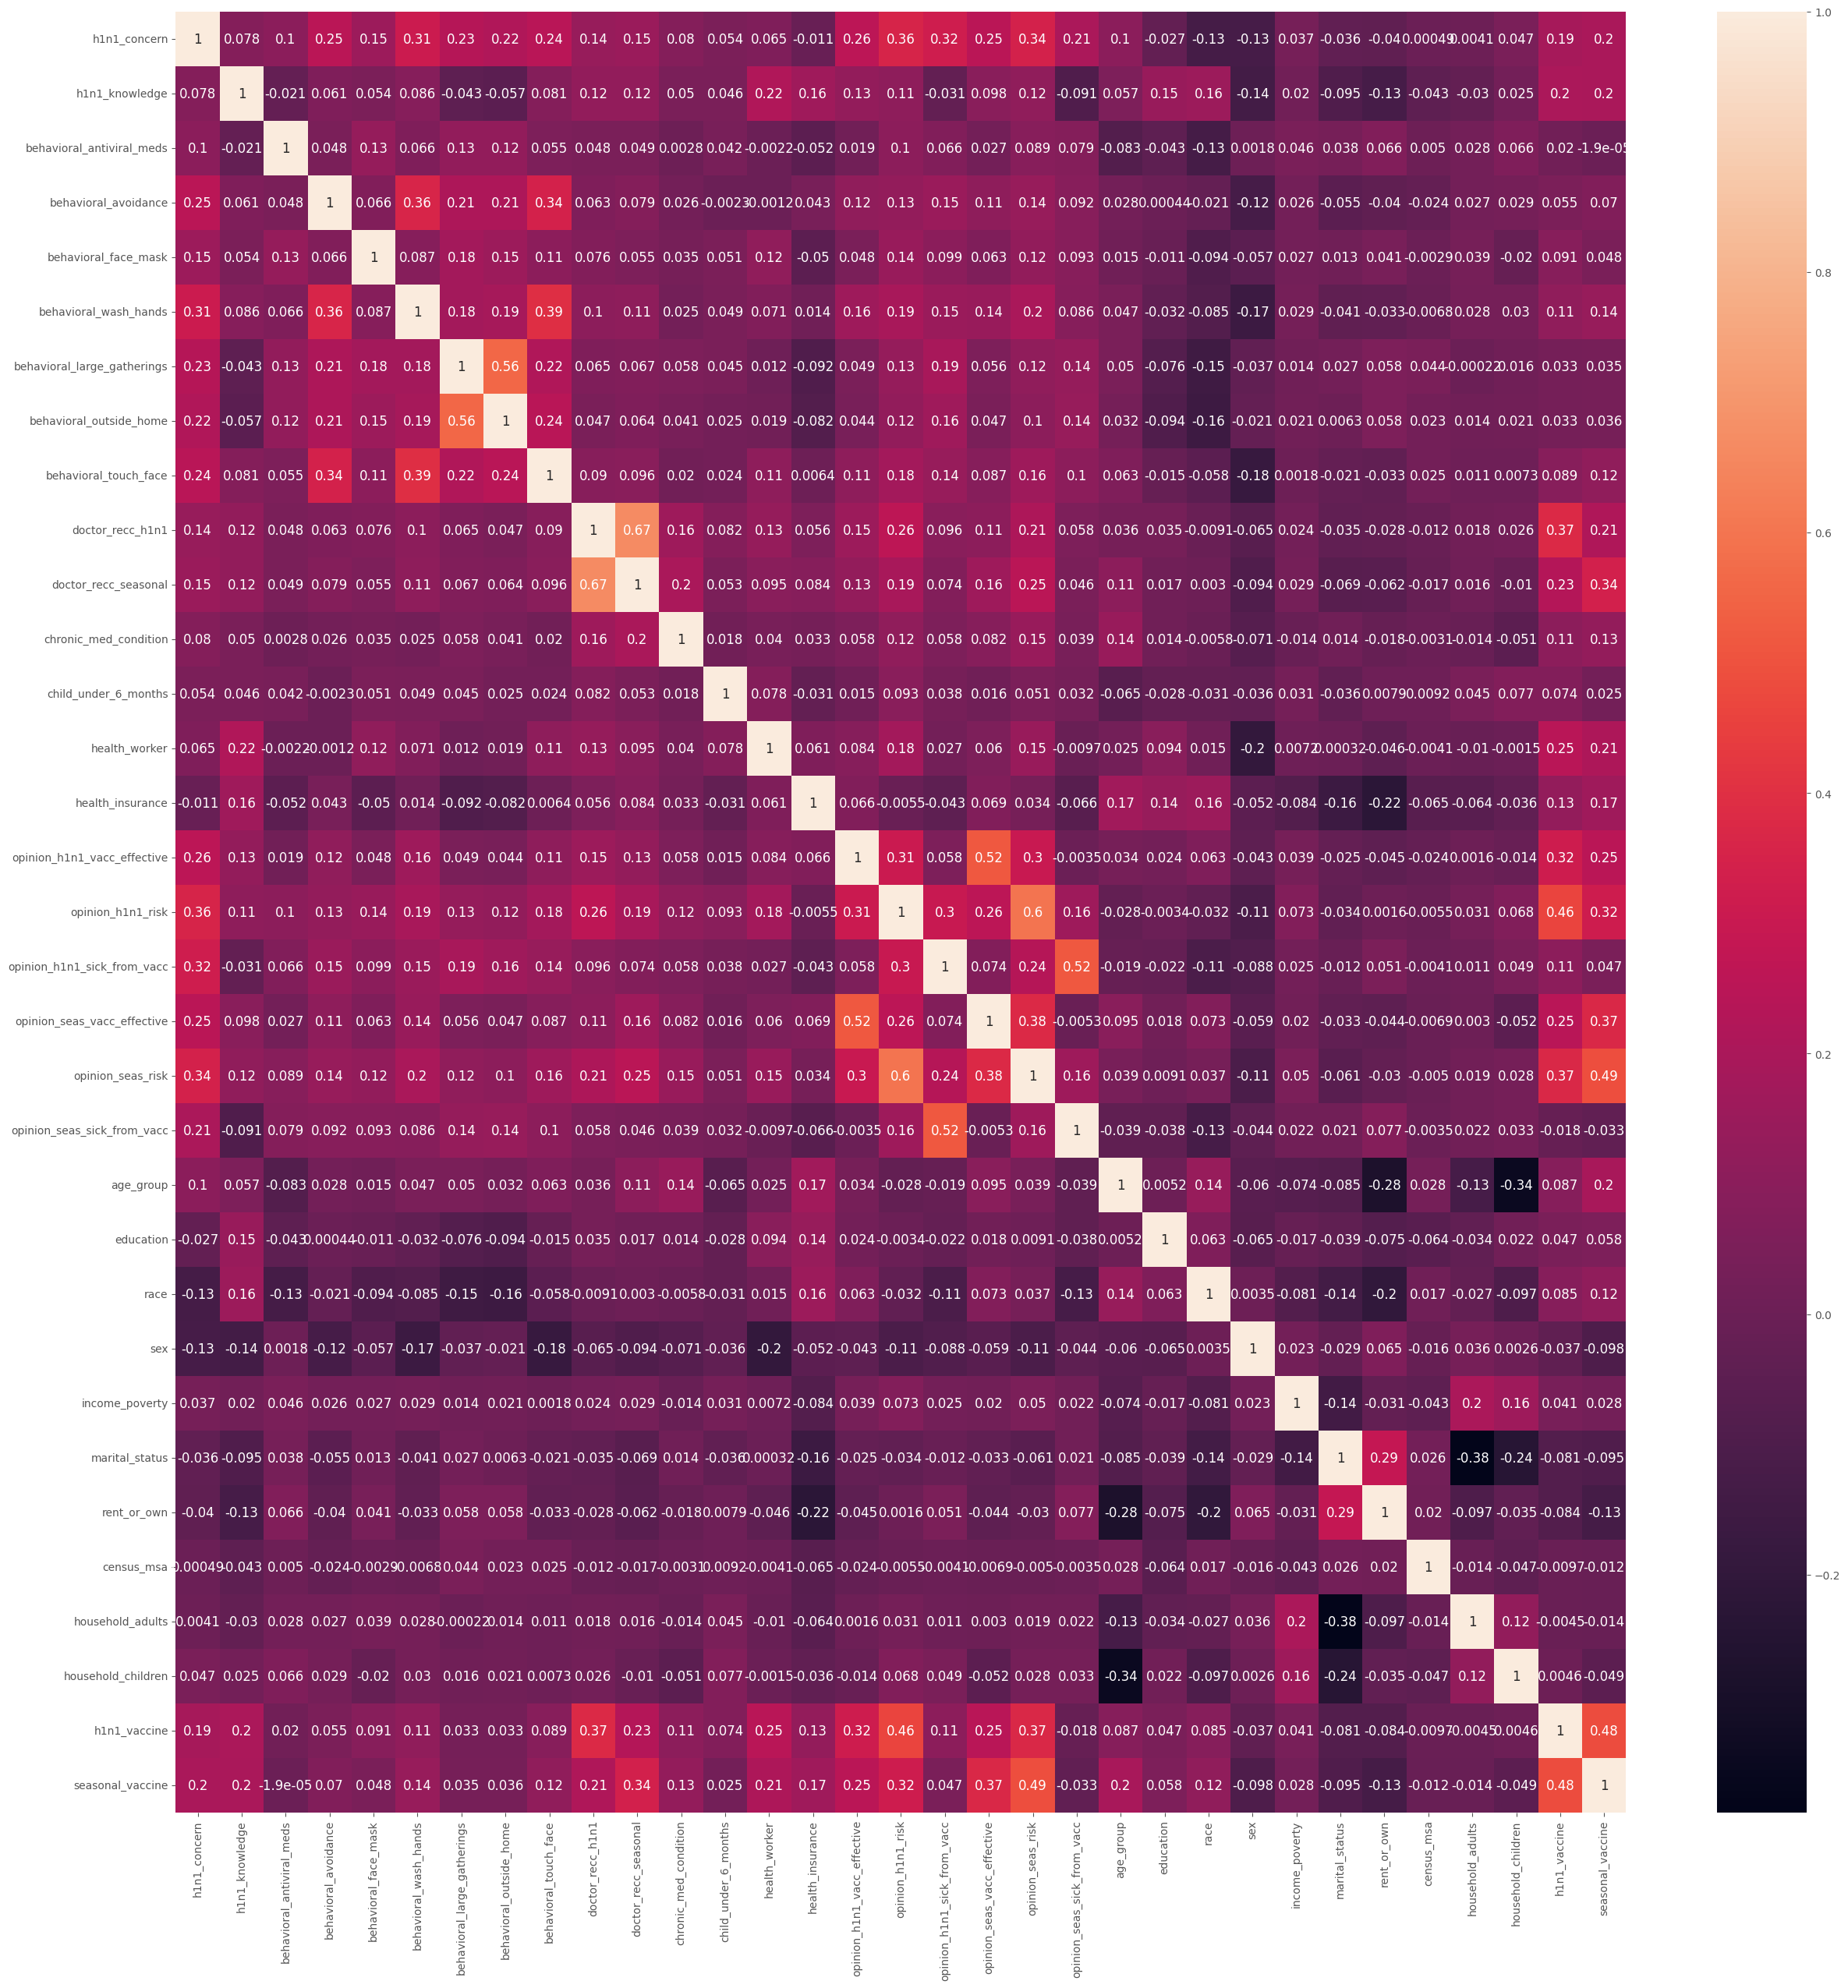

In [70]:
#analizando la correlación, incluyendo variables categóricas y la variable target
plt.figure(figsize=(30,30))
corrMatrix_t = df_training_eda_temporal.corr()
sns.heatmap(corrMatrix_t, annot=True, annot_kws={"fontsize":12})
plt.show()

In [71]:
#analizando la correlación de todas las variables con las variables targets
print(corrMatrix_t.loc[:,"h1n1_vaccine"].sort_values(ascending=False))
print("\n\n",corrMatrix_t.loc[:,"seasonal_vaccine"].sort_values(ascending=False))
print("\n\n")

#analizando la correlación con la variable que presenta más nulos income_poverty
#se observa que la mayor correlación es con household_adults->0.201980, pero aún así es muy
#baja para usarla como referencia para rellenar nulos, por ende debido a la alta cantidad
#de nulos y a la baja correlación con las variables targets (h1n1-> 0.041200, seasonal-> 0.028000)
#se elige eliminarlas posteriormente
print("\n\n",corrMatrix_t.loc[:,"income_poverty"].sort_values(ascending=False))

h1n1_vaccine                   1.000000
seasonal_vaccine               0.483127
opinion_h1n1_risk              0.460778
doctor_recc_h1n1               0.374376
opinion_seas_risk              0.373196
opinion_h1n1_vacc_effective    0.318694
health_worker                  0.246153
opinion_seas_vacc_effective    0.245726
doctor_recc_seasonal           0.231321
h1n1_knowledge                 0.203852
h1n1_concern                   0.189103
health_insurance               0.127450
behavioral_wash_hands          0.114809
opinion_h1n1_sick_from_vacc    0.108546
chronic_med_condition          0.106065
behavioral_face_mask           0.090719
behavioral_touch_face          0.089193
age_group                      0.086963
race                           0.085205
child_under_6_months           0.073705
behavioral_avoidance           0.054768
education                      0.046787
income_poverty                 0.041200
behavioral_large_gatherings    0.032941
behavioral_outside_home        0.032933


In [72]:
#################Trabajando con los nulos de las variables númericas#########################
###regresamos a usar el dataframe df_training_eda, donde se harán todos los cambios
"""Rellenando los nulos de las variables behavioral_outside_home y
behavioral_large_gatherings, los cuales tienen una correlación + de 0.59 """

cond_1 = df_training_eda.behavioral_outside_home.isnull()
cond_2 = df_training_eda.behavioral_large_gatherings.notnull()

#rellenando registros de behavioral_outside_home que tienen nulos con valores
#de los registros behavioral_large_gatherings
df_training_eda.behavioral_outside_home.loc[cond_1 & cond_2] = \
df_training_eda.behavioral_large_gatherings.notnull()

#rellenando registros de behavioral_large_gatherings que tienen nulos con valores
#de los registros behavioral_outside_home
df_training_eda.behavioral_large_gatherings.loc[(cond_1==False) & (cond_2==False)] = \
df_training_eda.behavioral_outside_home.notnull()

#ahora se rellenan los nulos de ambos con su moda
index_nulls_outside=df_training_eda.loc[cond_1,"behavioral_outside_home"].index
index_nulls_outside_large=df_training_eda.loc[cond_2==False,"behavioral_large_gatherings"].index

df_training_eda.behavioral_outside_home.iloc[index_nulls_outside]=df_training_eda.behavioral_outside_home.mode()
df_training_eda.behavioral_large_gatherings.iloc[index_nulls_outside_large]=df_training_eda.behavioral_large_gatherings.mode()

In [73]:
"""Rellenando los nulos de las variables doctor_recc_h1n1 y doctor_recc_seasonal, los cuales
tienen una correlación + de 0.67 """

cond_1 = df_training_eda.doctor_recc_h1n1.isnull()
cond_2 = df_training_eda.doctor_recc_seasonal.notnull()

#rellenando registros de doctor_recc_h1n1 que tienen nulos con valores
#de los registros doctor_recc_seasonal
df_training_eda.doctor_recc_h1n1.loc[cond_1 & cond_2] = \
df_training_eda.doctor_recc_seasonal.notnull()

#rellenando registros de doctor_recc_seasonal que tienen nulos con valores
#de los registros doctor_recc_h1n1
df_training_eda.doctor_recc_seasonal.loc[(cond_1==False) & (cond_2==False)] = \
df_training_eda.doctor_recc_h1n1.notnull()

#ahora se rellenan los nulos de ambos con su moda
index_nulls_h1n1=df_training_eda.loc[cond_1,"doctor_recc_h1n1"].index
index_nulls_seasonal=df_training_eda.loc[cond_2==False,"doctor_recc_seasonal"].index

df_training_eda.doctor_recc_h1n1.iloc[index_nulls_h1n1]=df_training_eda.doctor_recc_h1n1.mode()
df_training_eda.doctor_recc_seasonal.iloc[index_nulls_seasonal]=df_training_eda.doctor_recc_seasonal.mode()

In [74]:
###################Trabajando con los nulos de las variables categóricas###################
#1). como se mencionó antes se eliminará income_poverty
df_training_eda.drop("income_poverty", axis=1, inplace=True)
#2). todas las variables que tengan un <7% de nulls se rellenarán con la moda

# porcentaje de nulls de cada variable
condition_=df_training_eda.isnull().sum()*100/26707
df_training_eda.isnull().sum()*100/26707

condition_=df_training_eda.isnull().sum()*100/26707
col_pocos_nulls = df_training_eda.columns[(condition_>0) & (condition_<8)]

#aquellas columns que tengan nulos menores en un 1% se rellenarán con la moda
def fill_few_nulls(columns_a_rellenar, dframe):
 for col in columns_a_rellenar:
  #extraigo el valor que más aparece siendo la moda
  fill_=dframe[col].value_counts(normalize=True,sort=True, ascending=False, dropna=True).index[0]
  #índices en donde aparecen nulls
  cond_x = dframe[col].isnull()
  index_nulls=dframe.loc[cond_x,col].index
  #relleno los registros nulos con ese valor
  dframe[col].iloc[index_nulls]=fill_
#llamo a la función
fill_few_nulls(col_pocos_nulls,df_training_eda)

In [75]:
#comprobando que no hayan nulos en donde hicimos cambios
print(df_training_eda.isnull().sum()*100/26707)


h1n1_concern                   0.0
h1n1_knowledge                 0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               0.0
opinion_h1n1_vacc_effective    0.0
opinion_h1n1_risk              0.0
opinion_h1n1_sick_from_vacc    0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
marital_status                 0.0
rent_or_own                    0.0
employment_status              0.0
census_msa          

In [76]:
# Finalmente se convierten las variables categóricas en numéricas sobre el dataset eda original

df_training_eda['age_group']=label_encoder.fit_transform(df_training_eda["age_group"])
df_training_eda["education"]=label_encoder.fit_transform(df_training_eda["education"])
df_training_eda["race"]=label_encoder.fit_transform(df_training_eda["race"])
df_training_eda["sex"]=label_encoder.fit_transform(df_training_eda["sex"])
df_training_eda["marital_status"]=label_encoder.fit_transform(df_training_eda["marital_status"])
df_training_eda["rent_or_own"]=label_encoder.fit_transform(df_training_eda["rent_or_own"])
df_training_eda["employment_status"]=label_encoder.fit_transform(df_training_eda["employment_status"])
df_training_eda["census_msa"]=label_encoder.fit_transform(df_training_eda["census_msa"])

In [77]:
df_training_eda.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,...,age_group,education,race,sex,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.678811,0.272962,0.080054,0.108548,...,2.186131,1.741117,2.570300,0.406223,0.439735,0.222002,0.491894,0.833489,0.887558,0.529599
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.466942,0.445490,0.271382,0.311077,...,1.457320,1.073989,0.923226,0.491136,0.496364,0.415600,0.598964,0.823313,0.749980,0.925264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000


# Dataset final

Ahora vamos a exportar el dataset resultado a un csv nuevo.

In [78]:
df_training_eda.to_csv("training_set_features_eda_notnulls.csv")

# Calidad del dato

En esta sección vamos a exportar estadísticas de calidad del dato, tanto para el dataset original, como para el dataset depurado.

In [79]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.0 MB/s eta 0:00:00


In [80]:
def check(datos,nombreArchivo):
    o = datos.select_dtypes(include=[object])
    f = datos.select_dtypes(include=["datetime64"])
    n = datos.select_dtypes(include=["int64","float64"])

    print("Los siguientes dos numeros deberian coincidir")
    print("Vbles filtradas: ", o.shape[1] + f.shape[1]+ n.shape[1])
    print("Vbles totales: ", datos.shape[1])


    # VBLES FECHA:
    f1 = f.isnull().sum()
    f2 = f.min()
    f3 = f.max()
    f4 = f.nunique()

    f_sol = pd.concat([f1,f2,f3,f4],axis=1)
    f_sol.columns= ["empty_rows","min","max","unique_values"]

    # VBLES NUM:
    n1 = n.isnull().sum()
    n2 = n.mean()
    n3 = n.median()
    n4 = n.min()
    n5 = n.max()
    n6 = n.nunique()

    n_sol = pd.concat([n1,n2,n3,n4,n5,n6],axis=1)
    n_sol.columns= ["empty_rows","mean","median","min","max","unique_values"]

    # VBLES OBJECT:
    o1 = o.isnull().sum()
    o2 = o.apply(lambda x:x.value_counts().index[0] if (len(x.value_counts())>=1) else "")
    o3 = o.apply(lambda x:x.value_counts().iloc[0]  if (len(x.value_counts())>=1) else "")
    o4 = o.apply(lambda x:x.value_counts().index[1] if (len(x.value_counts())>=2) else "")
    o5 = o.apply(lambda x:x.value_counts().iloc[1]  if (len(x.value_counts())>=2) else "")
    o6 = o.apply(lambda x:x.value_counts().index[2] if (len(x.value_counts())>=3) else "")
    o7 = o.apply(lambda x:x.value_counts().iloc[2]  if (len(x.value_counts())>=3) else "")
    o8 = o.nunique()

    o_sol = pd.concat([o1,o2,o3,o4,o5,o6,o7,o8],axis=1)
    o_sol.columns= ["empty_rows","Factor1","CasesFactor1","Factor2","CasesFactor2","Factor3","CasesFactor3","unique_values"]


    # SAVING EVERYTHING IN ONE FILE
    #writer = pd.ExcelWriter(nombrearchivo)
    #o_sol.to_excel(writer,'VblesFactor')
    #n_sol.to_excel(writer,'VblesNumericas')
    #f_sol.to_excel(writer,'VblesFecha')
    #writer.save()

    # SAVING EVERYTHING IN ONE FILE WITH CONDITIONAL FORMAT
    writer = pd.ExcelWriter(nombreArchivo, engine='xlsxwriter')
    o_sol.to_excel(writer,'VblesFactor')
    n_sol.to_excel(writer,'VblesNumericas')
    f_sol.to_excel(writer,'VblesFecha')


    # Formatting Headers and Variable names
    workbook    = writer.book
    cell_format = workbook.add_format({'bold': True, 'font_color': '#ffffff', 'bg_color':"#1f497d"})

    # Formatting Factor
    worksheet = writer.sheets['VblesFactor']
    worksheet.conditional_format('A1:A140', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('A1:I1', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('B2:B140', {'type': '3_color_scale',
                                         'min_color': "#63be7b",
                                         'mid_color': "#fbea84",
                                         'max_color': "#f8696b"})  #
    worksheet.conditional_format('D2:D140', {'type': 'data_bar'})
    worksheet.conditional_format('F2:F140', {'type': 'data_bar'})
    worksheet.conditional_format('H2:H140', {'type': 'data_bar'})
    worksheet.conditional_format('I2:I140', {'type': '3_color_scale',  #
                                         'min_color': "#63be7b",
                                         'mid_color': "#fbea84",
                                         'max_color': "#f8696b"})  #

    # Formatting Numerics
    worksheet = writer.sheets['VblesNumericas']
    worksheet.conditional_format('A1:A140', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('A1:I1', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('B2:B140', {'type': '3_color_scale',
                                         'min_color': "#63be7b", #Verde
                                         'mid_color': "#fbea84", #Amarillo
                                         'max_color': "#f8696b"}) #Rojo

    worksheet.conditional_format('G2:G140', {'type': '3_color_scale'})


    # Formatting Fechas
    worksheet = writer.sheets['VblesFecha']
    worksheet.conditional_format('A1:A140', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('A1:I1', {'type': 'no_blanks', 'format': cell_format})
    worksheet.conditional_format('B2:B140', {'type': '3_color_scale',
                                         'min_color': "#63be7b", #Verde
                                         'mid_color': "#fbea84", #Amarillo
                                         'max_color': "#f8696b"}) #Rojo

    worksheet.conditional_format('E2:E140', {'type': '3_color_scale'})

    writer.save()


In [81]:
#%%
#CARGAMOS LOS DATOS
df_notnulls = pd.read_csv("training_set_features_eda_notnulls.csv",na_values=["\\N","//","///"])

#VEMOS DE QUE TIPO SON LAS COLUMNAS SI OBJECTO, NUMERICA, FECHA...
print(df_notnulls.dtypes)

#CAMBIAMOS COLUMNAS SI TENEMOS QUE HACERLO, POR JEMPLO ID A TEXT O NUMERICA A FECHA
#FECHA:
#df_notnulls["fecha"] = pd.to_datetime(df_notnulls.fecha,format="%Y/%m/%d")

#OBJECT
#variables_a_string = ["id","id_tienda_distribuidor"]
#df_notnulls.loc[:,variables_a_string]= df_notnulls.loc[:,variables_a_string].apply (lambda x:x.astype("str"))
#df_notnulls.origen.value_counts()

check(df_notnulls,"Analisis Flue Vaccines Prediction.xlsx")

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int64
sex                      

In [82]:
#CARGAMOS LOS DATOS ORIGINALES
df_original = pd.read_csv("training_set_features_original.csv",na_values=["\\N","//","///"])
print(df_original.dtypes)
check(df_original,"Analisis Flue Vaccines Prediction Original.xlsx")

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      